"""
# Heart Disease Prediction

- Trains a Random Forest model to predict heart disease based on medical data.
- Uses GridSearchCV for hyperparameter tuning.
- Evaluates performance with accuracy, precision, recall, and ROC-AUC.
- Takes user input and predicts heart disease (1 = Positive, 0 = Negative).

✅ Machine Learning-Based Diagnosis  
✅ Optimized with GridSearchCV  
✅ Real-Time Prediction  
✅ Performance Metrics Evaluation  
"""


## I. Importing essential libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'heart9.csv', 'Heart_disease_prediction_(1).ipynb', 'requirements.txt', 'venv']


## II. Importing and understanding our dataset

In [3]:
dataset = pd.read_csv("heart9.csv") 

#### Verifying it as a 'dataframe' object in pandas

In [4]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [5]:
dataset.shape

(1190, 12)

#### Printing out a few columns

In [6]:
dataset.head(5)

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [7]:
dataset.sample(5)

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
1168,47,1,3,130,253,0,0,179,0,0.0,1,0
1040,55,1,4,160,289,0,2,145,1,0.8,2,1
281,60,1,3,120,246,0,2,135,0,0.0,1,0
745,52,1,2,134,201,0,0,158,0,0.8,1,0
613,62,1,1,135,139,0,1,137,0,0.2,1,0


In [8]:
dataset.isnull().sum()

age        0
sex        0
cp         0
tresbps    0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
target     0
dtype: int64

#### Description

In [9]:
dataset.describe()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      1190 non-null   int64  
 1   sex      1190 non-null   int64  
 2   cp       1190 non-null   int64  
 3   tresbps  1190 non-null   int64  
 4   chol     1190 non-null   int64  
 5   fbs      1190 non-null   int64  
 6   restecg  1190 non-null   int64  
 7   thalach  1190 non-null   int64  
 8   exang    1190 non-null   int64  
 9   oldpeak  1190 non-null   float64
 10  slope    1190 non-null   int64  
 11  target   1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


#### Let's understand our columns better:

In [11]:
info = ["age","1: male, 0: female","chest pain type", "1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment",]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type
tresbps:			1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
chol:			resting blood pressure
fbs:			 serum cholestoral in mg/dl
restecg:			fasting blood sugar > 120 mg/dl
thalach:			resting electrocardiographic results (values 0,1,2)
exang:			 maximum heart rate achieved
oldpeak:			exercise induced angina
slope:			oldpeak = ST depression induced by exercise relative to rest
target:			the slope of the peak exercise ST segment


#### Analysing the 'target' variable

In [12]:
dataset["target"].describe()

count    1190.000000
mean        0.528571
std         0.499393
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [13]:
dataset["target"].unique()

array([0, 1])

<Axes: xlabel='sex', ylabel='target'>

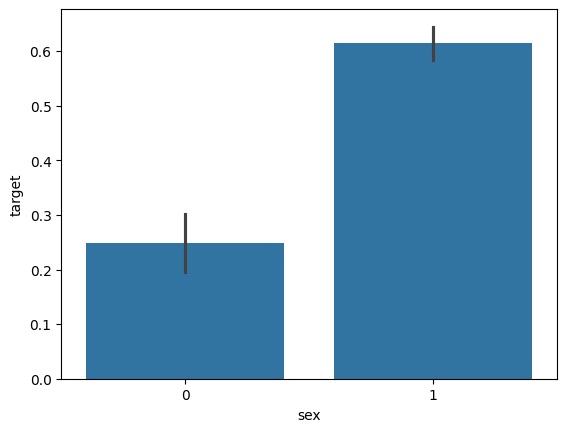

In [14]:
sns.barplot(x ='sex', y ='target', data = dataset)

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

## Exploratory Data Analysis (EDA)

### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [15]:
dataset["sex"].describe()

count    1190.000000
mean        0.763866
std         0.424884
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64

In [16]:
dataset["sex"].unique()

array([1, 0])

<Axes: xlabel='sex', ylabel='target'>

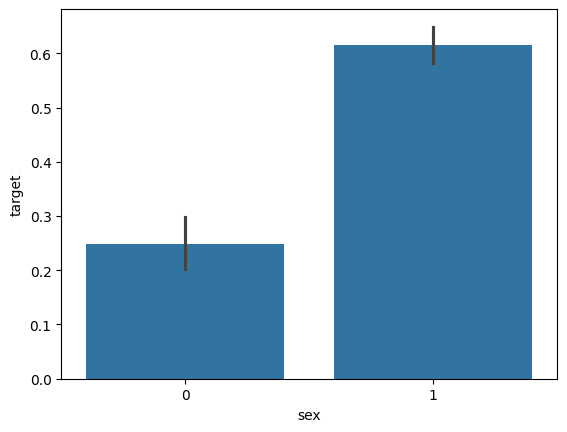

In [17]:
sns.barplot(x ='sex', y ='target', data = dataset)

##### We notice, that as expected, the 'sex' feature has 2 unique features

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [18]:
dataset["cp"].describe()

count    1190.000000
mean        3.232773
std         0.935480
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: cp, dtype: float64

In [19]:
dataset["cp"].unique()

array([2, 3, 4, 1])

<Axes: xlabel='cp', ylabel='target'>

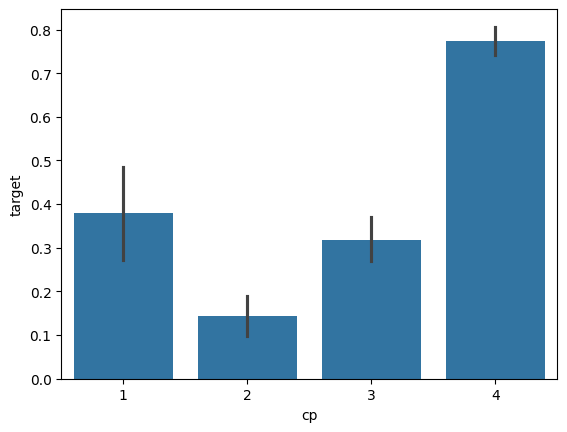

In [20]:
sns.barplot(x ='cp', y ='target', data = dataset)

##### As expected, the CP feature has values from 1 to 4

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [21]:
dataset["fbs"].describe()

count    1190.000000
mean        0.213445
std         0.409912
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fbs, dtype: float64

In [22]:
dataset["fbs"].unique()

array([0, 1])

<Axes: xlabel='fbs', ylabel='target'>

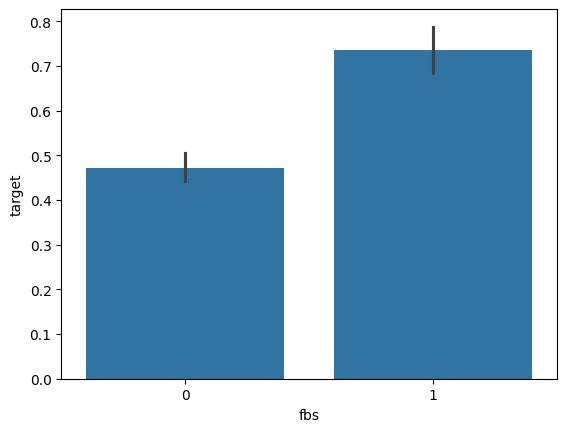

In [23]:
sns.barplot(x ='fbs', y ='target', data = dataset)

### Analysing the restecg feature

In [24]:
dataset["restecg"].unique()

array([0, 1, 2])

In [25]:
dataset["restecg"].unique()

array([0, 1, 2])

<Axes: xlabel='restecg', ylabel='target'>

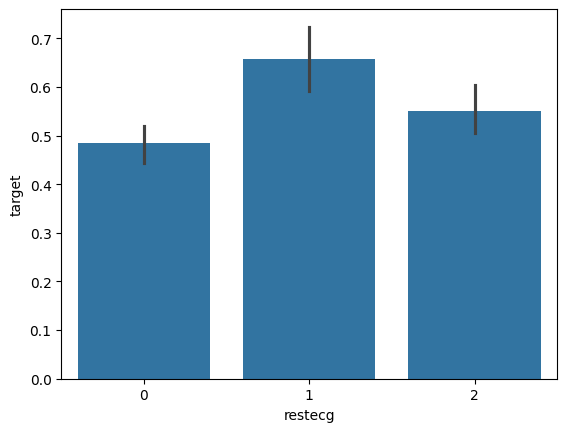

In [26]:
sns.barplot(x ='restecg', y ='target', data = dataset)

##### We realize that people with restecg '1' and '2' are much more likely to have a heart disease than with restecg '0'

### Analysing the Slope feature

In [27]:
dataset["slope"].unique()

array([1, 2, 3, 0])

<Axes: xlabel='slope', ylabel='target'>

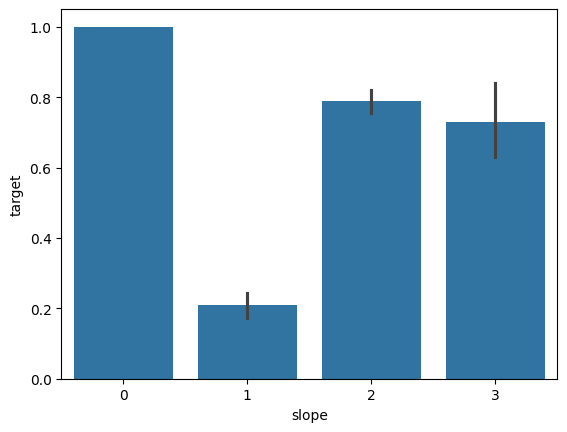

In [28]:
sns.barplot(x ='slope', y ='target', data = dataset)

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

## IV. Train Test split

In [29]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [30]:
X_train.shape

(952, 11)

In [31]:
X_test.shape

(238, 11)

In [32]:
Y_train.shape

(952,)

In [33]:
Y_test.shape

(238,)

## V. Model Fitting

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [35]:
from sklearn.metrics import roc_curve, roc_auc_score

### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()

model1.fit(X_train,Y_train)

Y_pred_model1 = model1.predict(X_test)

In [37]:
Y_pred_model1.shape

(238,)

In [38]:
score_model1 = round(accuracy_score(Y_pred_model1,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_model1)+" %")

The accuracy score achieved using Logistic Regression is: 80.67 %


<Axes: >

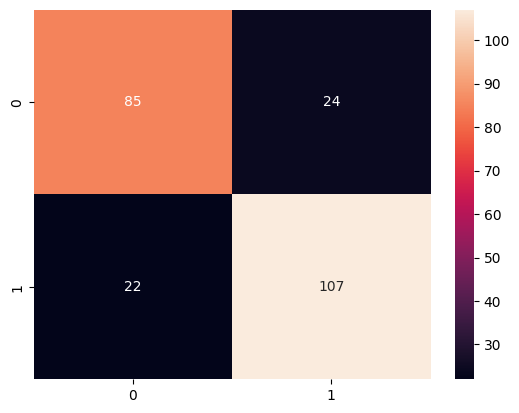

In [39]:
matrix= confusion_matrix(Y_test, Y_pred_model1)
sns.heatmap(matrix,annot = True, fmt = "d")



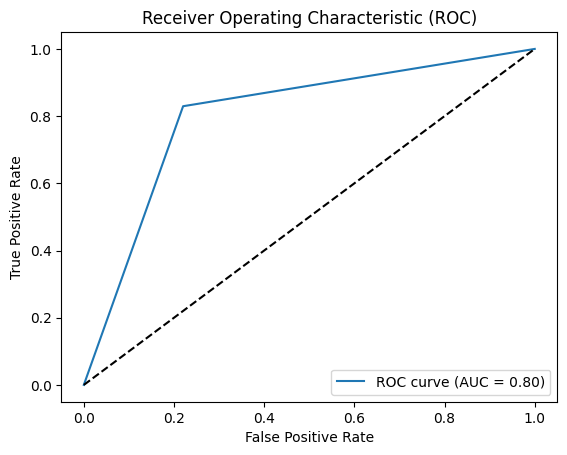

In [40]:
# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_model1)

# Compute the area under the ROC curve
roc_auc = roc_auc_score(Y_test, Y_pred_model1)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

model2= GaussianNB()

param_grid = {
    'var_smoothing': np.logspace(-9, 9, 10)   # Testing values from 1e-9 to 1
}

grid_search = GridSearchCV(model2, param_grid,cv=5, scoring="accuracy",n_jobs=-1)

grid_search.fit(X_train, Y_train)





GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.e-09, 1.e-07, 1.e-05, 1.e-03, 1.e-01, 1.e+01, 1.e+03, 1.e+05,
       1.e+07, 1.e+09])},
             scoring='accuracy')

In [42]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Train the best model
best_nb = grid_search.best_estimator_
Y_pred2 = best_nb.predict(X_test)

# Evaluate the model
print("\nTest Accuracy:", accuracy_score(Y_test, Y_pred2))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred2))

Best Parameters: {'var_smoothing': np.float64(1e-09)}
Best Cross-Validation Accuracy: 0.8329677597134196

Test Accuracy: 0.8529411764705882

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       109
           1       0.87      0.85      0.86       129

    accuracy                           0.85       238
   macro avg       0.85      0.85      0.85       238
weighted avg       0.85      0.85      0.85       238



In [43]:
score_model2 = round(accuracy_score(Y_pred2,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_model2)+" %")

The accuracy score achieved using Naive Bayes is: 85.29 %


<Axes: >

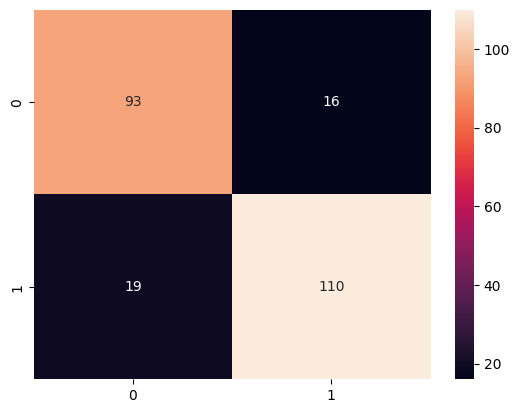

In [44]:
matrix= confusion_matrix(Y_test, Y_pred2)
sns.heatmap(matrix,annot = True, fmt = "d")


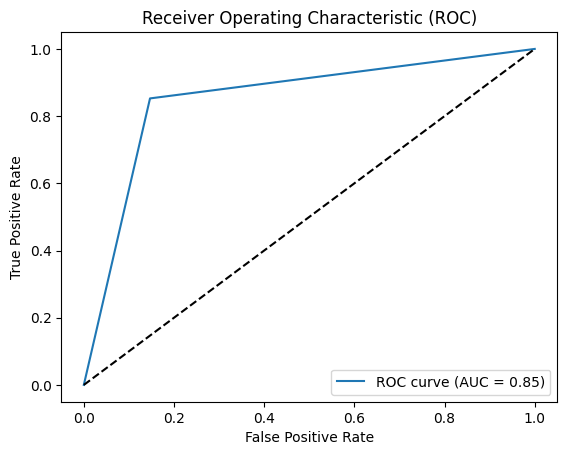

In [45]:
# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred2)

# Compute the area under the ROC curve
roc_auc = roc_auc_score(Y_test, Y_pred2)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

svm_model = SVC()

param_grid = {
    "C": [0.1, 1, 10],             # Regularization parameter
    "kernel": ["linear", "rbf"], # Kernel types
    "gamma": ["scale"],         # Kernel coefficient
    "degree": [2, 3]                 # Only used for 'poly' kernel
}

## Perform RandomizedSearch

random_search = RandomizedSearchCV(svm_model, param_grid, cv=5, scoring="accuracy", n_jobs=-1,n_iter=10,random_state=42)
random_search.fit(X_train, Y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Train the best model
best_svm = random_search.best_estimator_
Y_pred3 = best_svm.predict(X_test)

# Evaluate the model
print("\nTest Accuracy:", accuracy_score(Y_test, Y_pred3))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred3))



Best Parameters: {'kernel': 'linear', 'gamma': 'scale', 'degree': 3, 'C': 10}
Best Cross-Validation Accuracy: 0.835062000551116

Test Accuracy: 0.8277310924369747

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.77      0.80       109
           1       0.82      0.88      0.85       129

    accuracy                           0.83       238
   macro avg       0.83      0.82      0.83       238
weighted avg       0.83      0.83      0.83       238



In [47]:
score_model3 = round(accuracy_score(Y_pred3,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_model3)+" %")

The accuracy score achieved using Linear SVM is: 82.77 %


<Axes: >

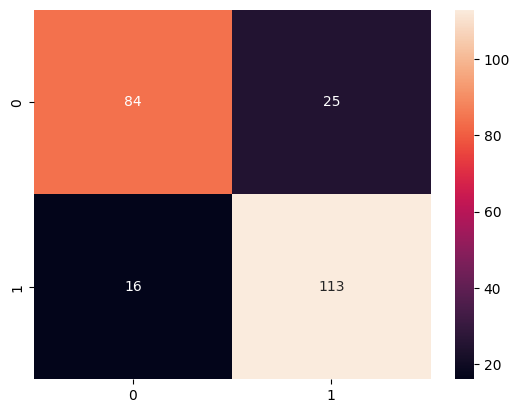

In [48]:
matrix= confusion_matrix(Y_test, Y_pred3)
sns.heatmap(matrix,annot = True, fmt = "d")


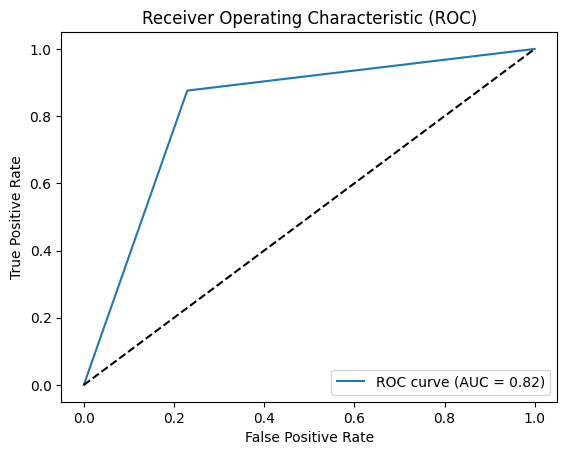

In [49]:
# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred3)

# Compute the area under the ROC curve
roc_auc = roc_auc_score(Y_test, Y_pred3)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### K Nearest Neighbors

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': range(1, 31), # Number of neighbors to consider, k = sqrt(n)
    'weights': ['uniform', 'distance'], # Weight function used in prediction
    "metric": ["euclidean", "manhattan", "minkowski"]  # Distance metrics}
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train,Y_train)

print("Best Parameters:", grid_search.best_params_)

print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Train the best model

best_knn = grid_search.best_estimator_
Y_pred4 = best_knn.predict(X_test)

# Evaluate the model
print("\nTest Accuracy:", accuracy_score(Y_test, Y_pred4))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred4))

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.8298263984568752

Test Accuracy: 0.8529411764705882

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       109
           1       0.86      0.87      0.86       129

    accuracy                           0.85       238
   macro avg       0.85      0.85      0.85       238
weighted avg       0.85      0.85      0.85       238



In [51]:
best_knn

KNeighborsClassifier(metric='manhattan', n_neighbors=16, weights='distance')

In [52]:
score_model4 = round(accuracy_score(Y_pred4,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_model4)+" %")

The accuracy score achieved using KNN is: 85.29 %


<Axes: >

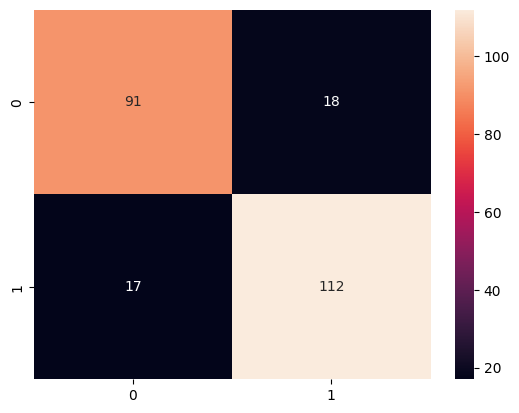

In [53]:
matrix= confusion_matrix(Y_test, Y_pred4)
sns.heatmap(matrix,annot = True, fmt = "d")


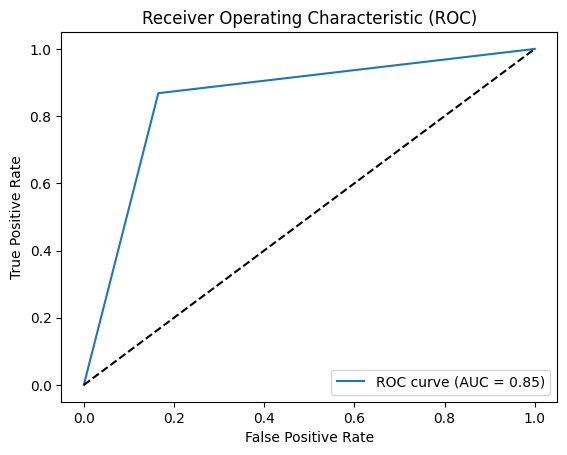

In [54]:
# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred4)

# Compute the area under the ROC curve
roc_auc = roc_auc_score(Y_test, Y_pred4)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### Decision Tree

In [55]:
# from sklearn.tree import DecisionTreeClassifier

# max_accuracy = 0


# for x in range(200):
#     model5 = DecisionTreeClassifier(random_state=x)
#     model5.fit(X_train,Y_train)
#     Y_pred_model5 = model5.predict(X_test)
#     current_accuracy = round(accuracy_score(Y_pred_model5,Y_test)*100,2)
#     if(current_accuracy>max_accuracy):
#         max_accuracy = current_accuracy
#         best_x = x

# print(max_accuracy)
# #print(best_x)


# model5 = DecisionTreeClassifier(random_state=best_x)
# model5.fit(X_train,Y_train)
# Y_pred_model5 = model5.predict(X_test)

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    "criterion": ["gini", "entropy"],          # Splitting criteria
    "max_depth": [10, 20, 30, None],           # Maximum depth of the tree
    "min_samples_split": [2, 5, 10],           # Minimum samples required to split a node
    "min_samples_leaf": [1, 2, 4]              # Minimum samples required at a leaf node
}

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Best parameters & best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Train the best model
best_dt = grid_search.best_estimator_
Y_pred5 = best_dt.predict(X_test)

# Evaluate the model
print("\nTest Accuracy:", accuracy_score(Y_test, Y_pred5))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred5))

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.8592449710664095

Test Accuracy: 0.8949579831932774

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       109
           1       0.93      0.88      0.90       129

    accuracy                           0.89       238
   macro avg       0.89      0.90      0.89       238
weighted avg       0.90      0.89      0.90       238



In [63]:
score_model5 = round(accuracy_score(Y_pred5,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_model5)+" %")

The accuracy score achieved using Decision Tree is: 89.5 %


<Axes: >

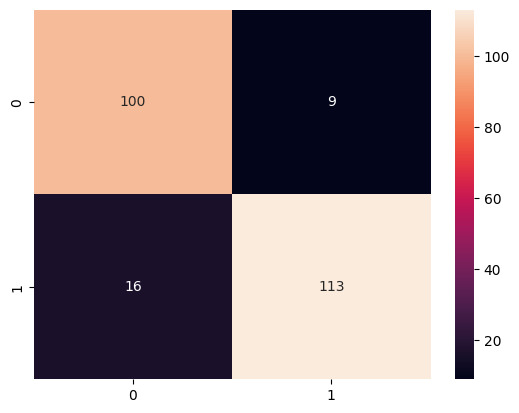

In [64]:
matrix= confusion_matrix(Y_test, Y_pred5)
sns.heatmap(matrix,annot = True, fmt = "d")


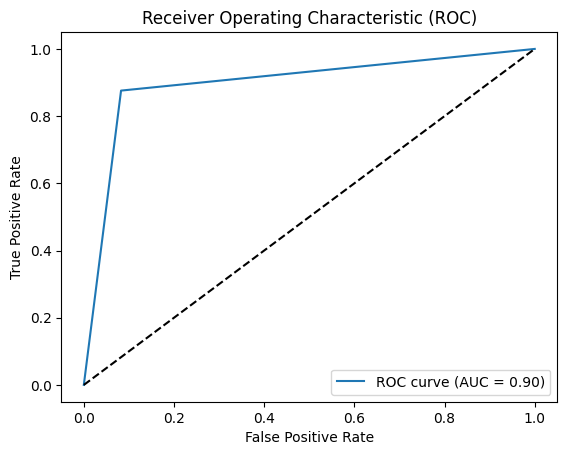

In [65]:
# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred5)

# Compute the area under the ROC curve
roc_auc = roc_auc_score(Y_test, Y_pred5)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [50, 100, 200],        # Number of trees in the forest
    "max_depth": [10, 20, 30, None],       # Maximum depth of each tree
    "min_samples_split": [2, 5, 10],       # Minimum samples required to split a node
    "min_samples_leaf": [1, 2, 4],         # Minimum samples required at a leaf node
    "bootstrap": [True, False]             # Use bootstrap sampling
}

grid_search6 = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search6.fit(X_train, Y_train)

best_rf = grid_search6.best_estimator_
Y_pred6 = best_rf.predict(X_test)

# Evaluate the model
print("\nTest Accuracy:", accuracy_score(Y_test, Y_pred6))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred6))


Test Accuracy: 0.9285714285714286

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       109
           1       0.93      0.94      0.93       129

    accuracy                           0.93       238
   macro avg       0.93      0.93      0.93       238
weighted avg       0.93      0.93      0.93       238



In [68]:
score_model6 = round(accuracy_score(Y_pred6,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_model6)+" %")

The accuracy score achieved using Decision Tree is: 92.86 %


<Axes: >

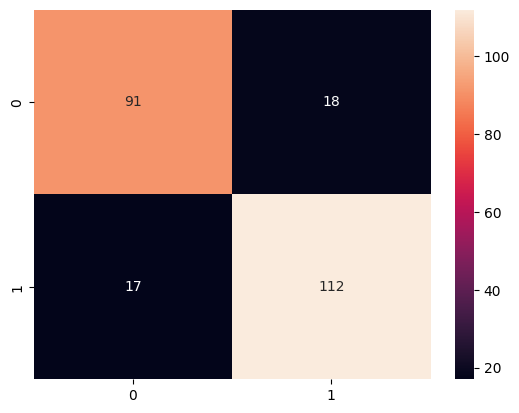

In [69]:
matrix= confusion_matrix(Y_test, Y_pred4)
sns.heatmap(matrix,annot = True, fmt = "d")


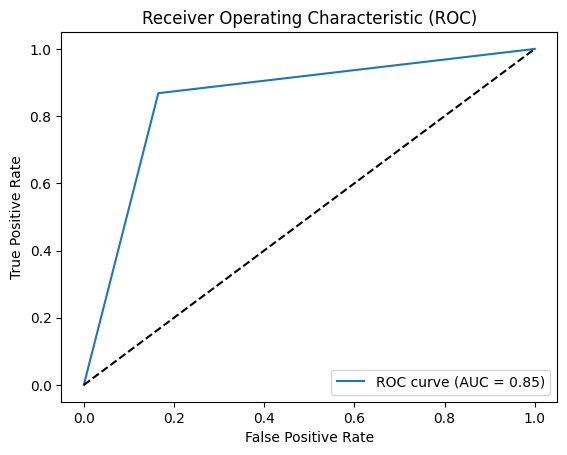

In [70]:
# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred4)

# Compute the area under the ROC curve
roc_auc = roc_auc_score(Y_test, Y_pred4)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## VI. Output final score

In [71]:
scores = [score_model1,score_model2,score_model3,score_model4,score_model5,score_model6]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","RandomForest"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 80.67 %
The accuracy score achieved using Naive Bayes is: 85.29 %
The accuracy score achieved using Support Vector Machine is: 82.77 %
The accuracy score achieved using K-Nearest Neighbors is: 85.29 %
The accuracy score achieved using Decision Tree is: 89.5 %
The accuracy score achieved using RandomForest is: 92.86 %


<function matplotlib.pyplot.show(close=None, block=None)>

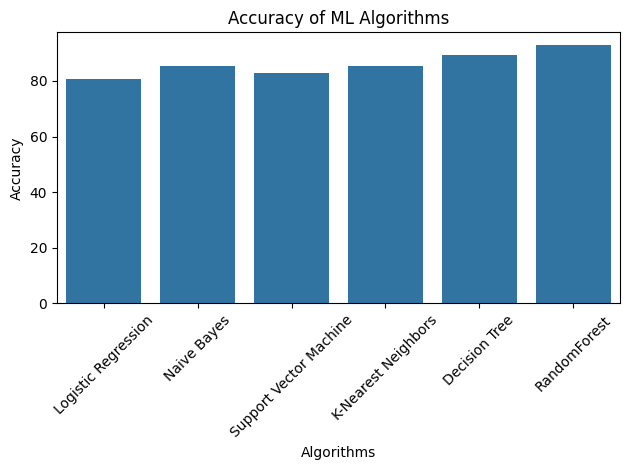

In [75]:
accuracy = [score_model1,score_model2,score_model3,score_model4,score_model5,score_model6]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","RandomForest"]

sns.barplot(x=algorithms, y=accuracy, fill=True)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy of ML Algorithms')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

In [77]:
input_data = (37,1,2,130,283,0,1,98,0,0,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = best_rf.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


#### This code trains a Random Forest classifier using GridSearchCV for hyperparameter tuning, evaluates its performance,and then uses the best model to predict whether a given individual has heart disease based on medical input data.


### Confusion Matric along with their Accuracy Score

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred_model1)
print(cm)
accuracy_score(Y_test, Y_pred_model1)

[[ 85  24]
 [ 22 107]]


0.8067226890756303

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred2)
print(cm)
accuracy_score(Y_test, Y_pred2)

[[ 93  16]
 [ 19 110]]


0.8529411764705882

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred3)
print(cm)
accuracy_score(Y_test, Y_pred3)

[[ 84  25]
 [ 16 113]]


0.8277310924369747

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred4)
print(cm)
accuracy_score(Y_test, Y_pred4)

[[ 91  18]
 [ 17 112]]


0.8529411764705882

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred5)
print(cm)
accuracy_score(Y_test, Y_pred5)

[[100   9]
 [ 16 113]]


0.8949579831932774

In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred6)
print(cm)
accuracy_score(Y_test, Y_pred6)

[[100   9]
 [  8 121]]


0.9285714285714286

### Conclusion:

The accuracy scores achieved using various machine learning algorithms are as follows:

- Logistic Regression: 80.06%
- Naive Bayes: 85.29%
- Support Vector Machine: 82.77%
- K-Nearest Neighbors: 85.29%
- Decision Tree: 89.49%
- Random Forest: 92.85%